Before submitting your HW, **please** rename it as yourname_yoursurname.ipynb.

In [174]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt

In [193]:
## Student no: 10002549
last_digit = 9
p = last_digit ** 2


----
## Below you will get your dataset, there is a parameter $p$, choose this parameter as  the ***square*** of the last digit of your student number (This is crucial for reproduction of your results).  Feel free to experiment with large and small smaples. Do your analysis for both large (size > 100) and small samples (size < 20).
----

In [179]:
def function(sample_size:int = 1000, p:int = 10) -> np.array:
    np.random.seed(p)
    A = 0.5 + np.random.randn(sample_size)
    B = np.random.chisquare(p, sample_size)
    return A + B

In [186]:
def normality_tests(data, alpha=0.05):
    # Shapiro-Wilk
    stat, p_shapiro = stats.shapiro(data)
    if p_shapiro > alpha:
        print("Shapiro-Wilk test: Data is normally distributed")
    else:
        print("Shapiro-Wilk test: Data is not normally distributed")

    # D'Agostino's K-squared
    stat, p_dagostino = stats.normaltest(data)
    if p_dagostino > alpha:
        print("D'Agostino's K-squared test: Data is normally distributed")
    else:
        print("D'Agostino's K-squared test: Data is not normally distributed")

    # Anderson-Darling
    result_anderson = stats.anderson(data)
    significance_level = alpha * 100
    idx = np.abs(result_anderson.significance_level - significance_level).argmin()
    critical_value = result_anderson.critical_values[idx]
    if result_anderson.statistic < critical_value:
        print("Anderson-Darling test: Data is normally distributed")
    else:
        print("Anderson-Darling test: Data is not normally distributed")

    # Jarque-Bera
    stat, p_jb = stats.jarque_bera(data)
    if p_jb > alpha:
        print("Jarque-Bera test: Data is normally distributed")
    else:
        print("Jarque-Bera test: Data is not normally distributed")


In [187]:
# histogram and Q-Q plot
def plot_data(data, title):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.hist(data, bins=30, edgecolor='black')
    plt.title(f'Histogram of {title}')

    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Q-Q plot of {title}')

    plt.tight_layout()
    plt.show()

Results for large sample size:
Shapiro-Wilk test: Data is not normally distributed
D'Agostino's K-squared test: Data is not normally distributed
Anderson-Darling test: Data is not normally distributed
Jarque-Bera test: Data is not normally distributed


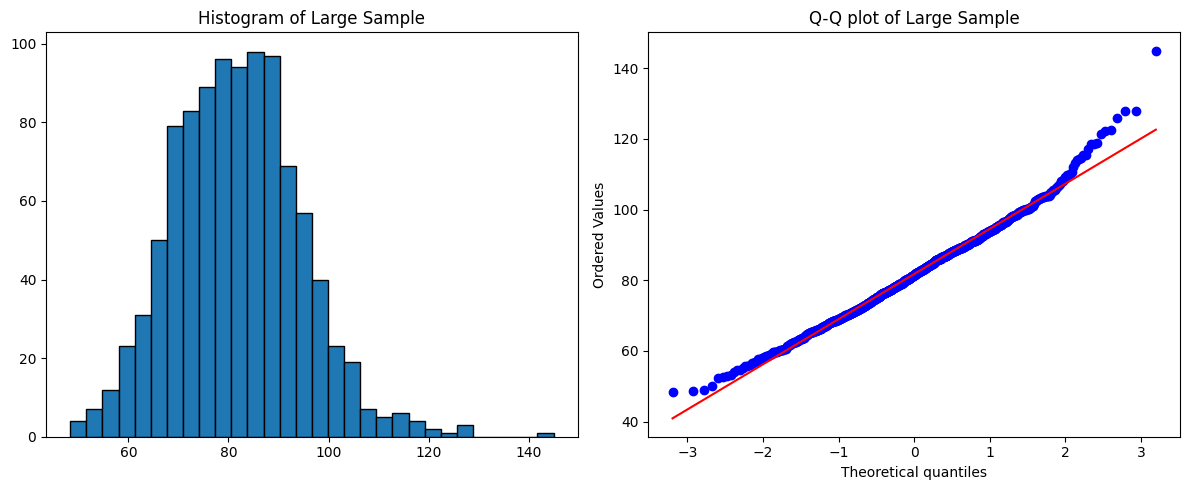

In [190]:
sample_size_large = 1000
sample_size_small = 15

data_large = function(sample_size_large, p)
data_small = function(sample_size_small, p)

print("Results for large sample size:")
normality_tests(data_large)
plot_data(data_large, "Large Sample")

Results for small sample size:
Shapiro-Wilk test: Data is normally distributed
D'Agostino's K-squared test: Data is normally distributed
Anderson-Darling test: Data is not normally distributed
Jarque-Bera test: Data is normally distributed


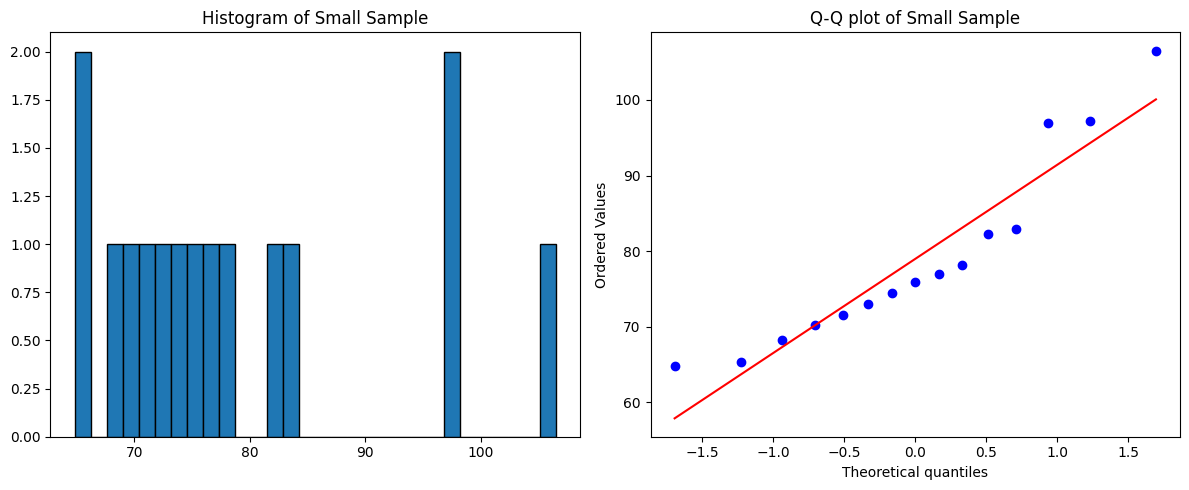

In [191]:
print("Results for small sample size:")
normality_tests(data_small)
plot_data(data_small, "Small Sample")

Tests Used:
  Shapiro-Wilk Test,
  D'Agostino's K-squared Test,
  Anderson-Darling Test,
  Jarque-Bera Test,

Null Hypothesis (H₀): Data is normally distributed.

Alternative Hypothesis (H₁): Data is not normally distributed.


## **Conclusion:**

The tests for the large sample show that it is not normally distributed. Since the tests are more effective for larger samples, the results for the larger sample are more reliable. Because 4/4 tests fails to reject Null Hypothesis, it could be said that the sample is not normally distributed.

Because the small sample size is only >20, the tests are less effective at detecting normality. Therefore, the results for this sample is not reliable. And since the data points are limited, its histogram and graph may be misleading. Because of that, it could be said that the sample is not normally distributed.